# Part II - Identification of Usage Patterns in the Ford GoBike System
## by Diego Fernando Pinzón López

## Investigation Overview


This investigation is an exploration with our main focus being to comprehend behavioral patterns of bike trips in San Francisco. Additionally, we aim to uncover whether there are distinct patterns in trips depending on the days of the week, hours of the day, and to ascertain if there is differentiated behavior between the two user types: customers and subscribers. Some questions can help to identify the patterns in trips like these:


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Comprising a meticulously cleaned collection of 174,952 records, this dataset is structured across 16 distinct fields.
The data contains a relevant information about temporal data, bike stations and user data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Data Wrangling

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata.csv')
bike_trips = df.copy()

# We convert the start_time, and the end_time variables from object to datetime format
bike_trips['start_time'] =  pd.to_datetime(bike_trips['start_time'])
bike_trips['end_time'] =  pd.to_datetime(bike_trips['end_time'])

# We delete the null info in the dataset. There is little information missing so it is prudent to delete
bike_trips = bike_trips.dropna()

# We create variables day_of_week and hour_of_day to have the day of the week and hour of start_time
bike_trips['day_of_week'] = bike_trips['start_time'].dt.day_name()
bike_trips['hour_of_day'] = bike_trips['start_time'].dt.hour

bike_trips['day_of_week'].replace({'Monday'   : '1.Monday'
                                  ,'Tuesday'  : '2.Tuesday'
                                  ,'Wednesday': '3.Wednesday'
                                  ,'Thursday' : '4.Thursday'
                                  ,'Friday'   : '5.Friday'
                                  ,'Saturday' : '6.Saturday'
                                  ,'Sunday'   : '7.Sunday'}
                                 ,inplace = True)

bike_trips['hour_of_day'] = bike_trips['hour_of_day'].replace({0: '00:00 - 00:59',   1: '01:00 - 01:59'
                                                              ,2: '02:00 - 02:59',   3: '03:00 - 03:59'
                                                              ,4: '04:00 - 04:59',   5: '05:00 - 05:59'
                                                              ,6: '06:00 - 06:59',   7: '07:00 - 07:59'
                                                              ,8: '08:00 - 08:59',   9: '09:00 - 09:59'
                                                              ,10: '10:00 - 10:59', 11: '11:00 - 11:59'
                                                              ,12: '12:00 - 12:59', 13: '13:00 - 13:59'
                                                              ,14: '14:00 - 14:59', 15: '15:00 - 15:59'
                                                              ,16: '16:00 - 16:59', 17: '17:00 - 17:59'
                                                              ,18: '18:00 - 18:59', 19: '19:00 - 19:59'
                                                              ,20: '20:00 - 20:59', 21: '21:00 - 21:59'
                                                              ,22: '22:00 - 22:59', 23: '23:00 - 23:59'})

# We reset_index
bike_trips.reset_index(drop = True, inplace = True)

base = bike_trips[['start_time']]
base['start_time'] = base['start_time'].dt.date

bike_trips['duration_min'] = round(bike_trips['duration_sec']/60,0)
bike_trips['duration_hour'] = round(bike_trips['duration_sec']/3600,1)

bike_trips['duration_min_range'] = pd.cut(bike_trips['duration_min']
                                         ,[0,10,20,30,60,90,120] + [24*60])

bike_trips['duration_min_range'] = bike_trips['duration_min_range'].astype(str)\
                                                                   .replace({'(0, 10]' : '1. 0 min - 10 min'
                                                                            ,'(10, 20]' : '2. 10 min - 20 min'
                                                                            ,'(20, 30]' : '3. 20 min - 30 min'
                                                                            ,'(30, 60]' : '4. 30 min - 60 min'
                                                                            ,'(60, 90]' : '5. 60 min - 90 min'
                                                                            ,'(90, 120]' : '6. 90 min - 120 min'
                                                                            ,'(120, 1440]' : '7. 120 min +'})
bike_trips['age'] = (2019 - bike_trips['member_birth_year']).astype(int)

bike_trips['range_age'] = pd.cut(bike_trips['age']
                                ,[17,25,32,39,46,53,60,180])

bike_trips['range_age'].astype(str).replace({'(17, 25]':'18-25'
                                            ,'(25, 32]':'26-32'
                                            ,'(32, 39]':'33-39'
                                            ,'(39, 46]':'40-46'
                                            ,'(46, 53]':'47-53'
                                            ,'(53, 60]':'54-60'
                                            ,'(60, 180]':'60+'}, inplace = True)

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## When are most trips taken in terms of time of day, day of the week?

We only have information for trips made in February 2019. We can see that one of the key findings highlights the pattern of bicycle use during weekdays and in the morning and afternoon. This behavior can be attributed to the fact that San Franciscans use their bikes to get to work or back home.

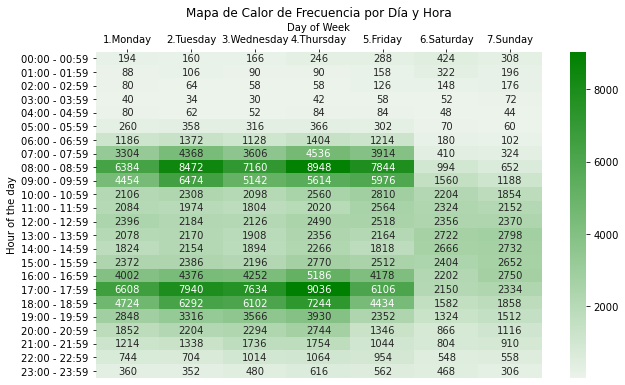

In [3]:
calendar = pd.pivot_table(bike_trips[['hour_of_day','day_of_week']]
                         ,index = ['hour_of_day']
                         ,columns = ['day_of_week']
                         ,aggfunc = np.size)

plt.figure(figsize=(10, 6))

custom_palette = sb.light_palette("green", as_cmap=True)
ax = sb.heatmap(calendar
               ,cmap = custom_palette
               ,annot=True
               ,fmt = 'd')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.title('Mapa de Calor de Frecuencia por Día y Hora')
plt.xlabel('Day of Week')
plt.ylabel('Hour of the day')

plt.show()

## How long does the average trip take?

Among the analyzed information of 174.952 records of trips, there was it is evident that the average duration of a trip is 11.73 minutes per travel. The duration of these trips, 62% of the data indicates that a trip lasts less than 10 minutes. Additionally, 28.74% of trips have a duration between 10 and 20 minutes, meaning that in general, 90% of trips are completed in less than 20 minutes.

The average of a trip in minutes is: 11.73


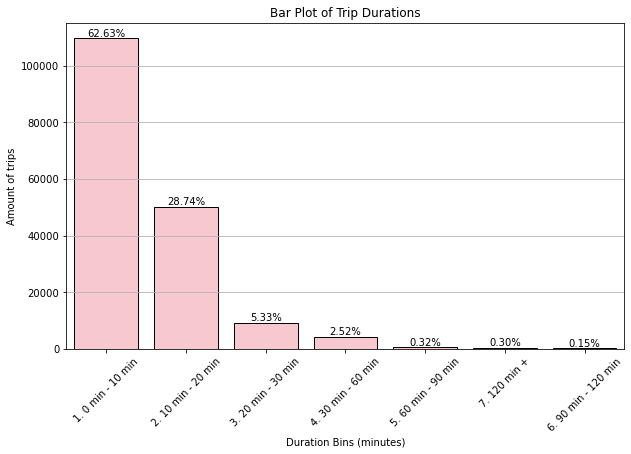

In [4]:
val = round(bike_trips['duration_min'].mean(),2)
print(f'The average of a trip in minutes is: {val}')
value_counts = bike_trips['duration_min_range'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.sort_index().plot(kind = 'bar'
                              ,color = 'pink'
                              ,edgecolor = 'black')
ax = sb.barplot(x=value_counts.index
               ,y=value_counts.values
               ,color='pink'
               ,edgecolor='black')

total_trips = value_counts.sum()

for index, value in enumerate(value_counts.values):
    percentage = (value / total_trips) * 100
    ax.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Bar Plot of Trip Durations')
plt.xlabel('Duration Bins (minutes)')
plt.ylabel('Amount of trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Does the previous questions depend on if a caracteristics of users?

In a broader sense, it is evident that men require less time for bicycle usage and constitute a larger share in the bicycle user market.

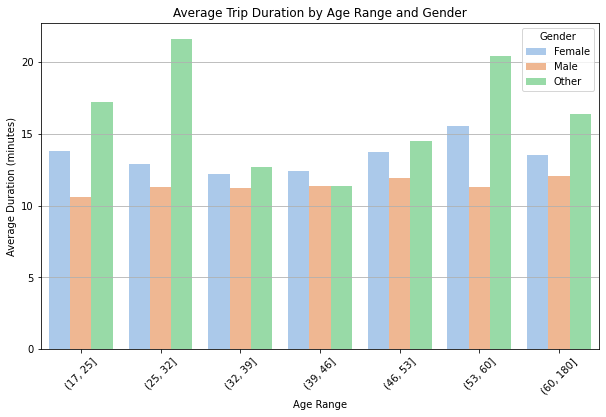

In [5]:
grouped_data = bike_trips.groupby(['range_age', 'member_gender'])['duration_min'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data = grouped_data
          ,x = 'range_age'
          ,y = 'duration_min'
          ,hue = 'member_gender'
          ,palette='pastel')
plt.title('Average Trip Duration by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (minutes)')

# Add legend
plt.legend(title='Gender'
          ,loc='upper right')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()



A user categorized as 'customer' spends twice as much time on bicycle usage compared to a user marked as a 'subscriber', regardless of their age or gender. This may imply that subscribed customers utilize bicycles more frequently than customers.

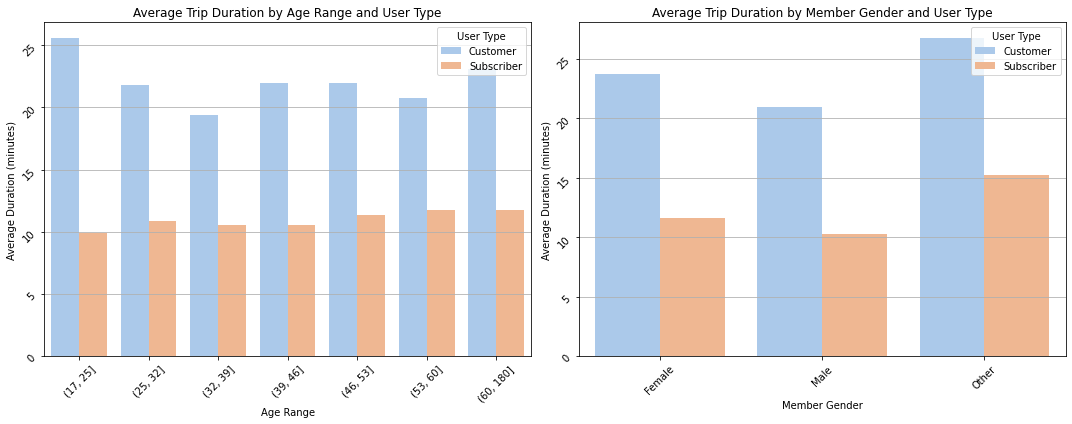

In [6]:
# First Plot
grouped_data_age = bike_trips.groupby(['range_age', 'user_type'])['duration_min'].mean().reset_index()

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Age and User Type
sb.barplot(data=grouped_data_age,
            x='range_age',
            y='duration_min',
            hue='user_type',
            palette='pastel',
            ax=axes[0])
axes[0].set_title('Average Trip Duration by Age Range and User Type')
axes[0].set_xlabel('Age Range')
axes[0].set_ylabel('Average Duration (minutes)')
axes[0].legend(title='User Type', loc='upper right')
axes[0].tick_params(rotation=45)
axes[0].grid(axis='y')

# Second Plot
grouped_data_gender = bike_trips.groupby(['member_gender', 'user_type'])['duration_min'].mean().reset_index()

# Plot for Member Gender and User Type
sb.barplot(data=grouped_data_gender,
            x='member_gender',
            y='duration_min',
            hue='user_type',
            palette='pastel',
            ax=axes[1])
axes[1].set_title('Average Trip Duration by Member Gender and User Type')
axes[1].set_xlabel('Member Gender')
axes[1].set_ylabel('Average Duration (minutes)')
axes[1].legend(title='User Type', loc='upper right')
axes[1].tick_params(rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [9]:
!jupyter nbconvert Part_II_slide_Ford_GoBike_System_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_Ford_GoBike_System_Data.ipynb to slides
[NbConvertApp] Writing 797121 bytes to Part_II_slide_Ford_GoBike_System_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_